# Project: Automating Classification of Audio-Visual Content and Rating for Regulation and Personal Use

# 1. Business understanding

The government regulator of audiovisual content is mandated to regulate audiovisual content in Kenya for age appropriateness, i.e. GE, PG,16,18, and Restricted, based on the film classification guidelines for 2012. The Classification guidelines have established a scale rating of 0-5 based on the frequency and intensity of all the classifiable elements. The rating includes 
0 – 1: Low impact classifiable elements – General Exhibition (GE),2: Mild impact classifiable elements – Parental Guidance (PG), 3: Moderate impact classifiable elements – 16,4: Strong impact classifiable elements -18 and 5: Extreme impact classifiable elements – Restricted. 

##  Business Problem Statement
However, with the rapid growth of film and digital media production, especially on TikTok and YouTube, manual review and classification of thousands of entries, each with unique genres, synopses, and sources, is time-consuming, resource-intensive, and prone to inconsistencies.

This project aims to assist the regulator in classifying the audiovisual content by building a machine learning model that can predict a film’s classification rating (e.g., GE, PG, 16, 18 and Restricted) based on its genre, synopsis, class of film, duration, country of origin, platform, and other available data. The automation will support improving on regulatory efficiency by providing rating suggestions to film examiners, enhance parental control tools that will help parents flag potentially inappropriate audiovisual content for children, build a recommendation system of filtering audiovisual content based on age-appropriateness profile and interests and finally support local content categorisation and promote films produced in the Country.


##  Domain of Application
This project sits at the intersection of several domains, including media and entertainment, where it supports content management and accessibility; government and regulatory compliance, aiding institutions in efficiently classifying film content; natural language processing and machine learning, particularly in the area of text classification; and educational technology, where it contributes to developing systems for age-appropriate content filtering and parental control.

##  Target Audience
The primary stakeholders for this solution include film classification authorities, such as the Kenya Film Classification Board (KFCB), who can benefit from automated tools for rating assignment. It also serves streaming service providers like Netflix or Maisha Magic, helping streamline internal content tagging. Additionally, it’s relevant to parents and educators who require safeguards for children's viewing content, and developers working on recommendation systems, who need structured metadata to personalize content delivery.



# 2. Data understanding
 The project utilizes film classification data sourced from the Kenya Film Classification Board (KFCB), covering the years 2022 to 2025. The dataset includes a range of attributes such as film title, genre, synopsis, official rating, platform of release, duration, classification date, and country of origin.

# 3. Data Preparation
Our goal is to collect data on audiovisual content classification over the last three (3) years and handle the missing values, feature engineering by converting the date classified into year, month and day of the week, extract text features from the synopsis by applying either TF-IDF 

### Importing Essential Libraries

We will start by importing all libraries used throughout the notebook.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Loading the dataset

In [27]:
df1= pd.read_excel('data/Films Classified 2022-2023.xlsx', header=2, index_col=0)
df1.head()

,FILM TITLE,CLASS OF FILM,GENRE,SYNOPSIS,RATING,CAI,JUSTIFICATION,DURATION(MINS),DATE CLASSIFIED,COUNTRY OF ORIGIN,VENUE,CLIENT,CONTACT,PLATFORM,WEBSITE
NO,,,,,,,,,,,,,,,
1,Rashtra Kavach OM,NaN,Action,Rashtra Karachi OM is an action Indian film de...,16,"V,A,S","Pain inflicting violence scenes,cold blood mur...",135,2022-01-07 00:00:00,India,Westgate,Century pictures,cedric@centurycinemax.net,Cinema,NaN
2,Rockecty -thr Nambi effect,NaN,Docu-drama,"Nambi, a patriotic scientist struggled hard to...",16,"V,A,L",The film contains use of violence and alcohol....,157,2022-01-07 00:00:00,India,Sarit Centre,Century pictures,cedric@centurycinemax.net,Cinema,NaN
3,THOR-Love and Thunder,NaN,Action- Adventure,Thor embarks on a journey unlike anything he ...,16,"V,N,S",the film contains violent scenes coupled with ...,120,2022-01-07 00:00:00,USA,Green span,Crimson Multimedia,Collins@crimsonmultimedia.com,Cinema,NaN
4,Kyalo culture episode 4,NaN,Reality Show,The story of Betty Kyallo continues ...this ep...,GE,-,minimal classifiable elements hence suitable f...,28,2022-04-07 00:00:00,Kenya,office/kfcb,Young Rich Tv,caroline@youngrichtv.com,Showmax,NaN
5,Roast house Sanaa,NaN,Comedy,Sanaipei Tande is brought into roasting seat w...,16,"L,A","the film contains use of vulgar language, use ...",29,2022-04-07 00:00:00,Kenya,office/kfcb,Young Rich Tv,caroline@youngrichtv.com,Showmax,NaN


After loading the dataset, we begin by performing a statistical summary to understand the distribution of the data. We also examine the structure of the DataFrame by checking its shape (number of rows and columns), retrieving general information about the dataset (including data types and missing values), and identifying which columns are numerical and which are non-numerical. This initial exploration helps us assess the overall composition of the dataset and informs our next steps in the analysis.

## Previewing the Data
#### Reviewing the data for the financial year 2022-2023

In [28]:
# shape of the dataset
df1.shape

(786, 15)

In [29]:
# Dataset information
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 786 entries, 1 to 786
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FILM TITLE         786 non-null    object 
 1   CLASS OF FILM      0 non-null      float64
 2   GENRE              784 non-null    object 
 3   SYNOPSIS           785 non-null    object 
 4   RATING             783 non-null    object 
 5   CAI                782 non-null    object 
 6   JUSTIFICATION      781 non-null    object 
 7   DURATION(MINS)     783 non-null    object 
 8   DATE CLASSIFIED    720 non-null    object 
 9   COUNTRY OF ORIGIN  785 non-null    object 
 10  VENUE              786 non-null    object 
 11  CLIENT             774 non-null    object 
 12  CONTACT            771 non-null    object 
 13  PLATFORM           770 non-null    object 
 14  WEBSITE            290 non-null    object 
dtypes: float64(1), object(14)
memory usage: 98.2+ KB



Summary of Data Understanding

* The dataset has  786 rows and 15 columns

* Mostly complete: Most columns have 98% data

Missing:

* CLASS OF FILM - completely empty

* WEBSITE - about 63% missing

* Minor gaps in DATE CLASSIFIED, CLIENT, CONTACT, PLATFORM

* Possible issue: DURATION(MINS) is text , should be numeric.

#### Reviewing the data for the financial year 2023-2024

In [30]:
# loading 2023-2024 dataset
df2= pd.read_excel('Data\Films Classified 2023-2024.xlsx', header=2,index_col=0)
df2.head()

,FILM TITLE,CLASS OF FILM,GENRE,SYNOPSIS,RATING,CAI,JUSTIFICATION,DURATION(MINS),DATE CLASSIFIED,COUNTRY OF ORIGIN,VENUE,CLIENT,CONTACT,PLATFORM,WEBSITE
NO,,,,,,,,,,,,,,,
1,"Kyallo Culture, SN2 EP7",NaN,Reality,Mercy visits a long time friend JB who is the ...,PG,S,Mild sexual reference,27,2023-05-07 00:00:00,Kenya,NaN,NaN,NaN,NaN,NaN
2,This Love +1 Ep 10,NaN,Reality,"Wahu,Nameless,Terence and Milly meet up and ca...",GE,-,Low impact classifiable elements,28,2023-05-07 00:00:00,Kenya,NaN,NaN,NaN,NaN,NaN
3,Circus,NaN,Comedy,The film is about a man who has come of age an...,PG,"V, S, C, O","The has a mild impact on Violence, Crime, Sex,...",160,2023-06-07 00:00:00,India,NaN,NaN,NaN,NaN,NaN
4,Mission Impossible 7,NaN,Action,IMF agent Ethan Hunt is assigned to retrieve h...,16,"V, S, C, O","The has a moderate impact on Violence, Crime, ...",163,2023-10-07 00:00:00,USA,NaN,NaN,NaN,NaN,NaN
5,"Kyallo Culture, SN2 EP8",NaN,Reality,"In this episode, the sisters meet in Bao Box f...",PG,"S, A","The has a mild impact on Violence, Crime, Sex,...",28,13/07/2023,KENYA,NaN,NaN,NaN,NaN,NaN


In [31]:
# shape of the dataset
df2.shape

(1025, 15)

In [32]:
#dataset information
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1025 entries, 1 to 1025
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FILM TITLE         1023 non-null   object 
 1   CLASS OF FILM      0 non-null      float64
 2   GENRE              1009 non-null   object 
 3   SYNOPSIS           957 non-null    object 
 4   RATING             1008 non-null   object 
 5   CAI                706 non-null    object 
 6   JUSTIFICATION      780 non-null    object 
 7   DURATION(MINS)     922 non-null    object 
 8   DATE CLASSIFIED    953 non-null    object 
 9   COUNTRY OF ORIGIN  1006 non-null   object 
 10  VENUE              124 non-null    object 
 11  CLIENT             560 non-null    object 
 12  CONTACT            405 non-null    object 
 13  PLATFORM           577 non-null    object 
 14  WEBSITE            0 non-null      float64
dtypes: float64(2), object(13)
memory usage: 128.1+ KB


Dataset Summary Information

* The dataset has 1025 rows and 15 columns
 
* Several columns are well-populated and usable.

* Some fields (e.g., VENUE, CLIENT, CONTACT) have substantial gaps.

* CLASS OF FILM and WEBSITE have no data - likely candidates for removal.

* Dataset needs missing value handling and data type cleaning before analysis.

#### Reviewing the data for the financial year 2024-2025

In [33]:
df3= pd.read_excel('Data\Films Classified 2024-2025.xlsx', index_col=0)
df3.head()

,FILM TITLE,CLASS OF FILM,GENRE,SYNOPSIS,RATING,CAI,JUSTIFICATION,DURATION(MINS),DATE CLASSIFIED,COUNTRY OF ORIGIN,VENUE,CLIENT,CONTACT,PLATFORM,WEBSITE,Unnamed: 16
NO,,,,,,,,,,,,,,,,
1,Letters for Good Episode 2-Trailer,NaN,Docu-Drama,"Through Safaricom Foundation, Gilbert shares h...",GE,-,No Impact Classifiable Elements,29 Secs,2024-01-07 00:00:00,Kenya,KFCB,Quite Bright Films,NaN,YouTube,uploaded,NaN
2,Letters for Good Episode 2,NaN,Docu-Drama,"Through Safaricom Foundation, Gilbert shares h...",GE,-,No Impact Classifiable Elements,10,2024-01-07 00:00:00,Kenya,KFCB,Quite Bright Films,NaN,YouTube,uploaded,NaN
3,Letters for Good Episode 3,NaN,Docu-Drama,Gideon Wafula a businessman narrates how Safar...,GE,-,No Impact Classifiable Elements,10,2024-01-07 00:00:00,Kenya,KFCB,Quite Bright Films,NaN,YouTube,uploaded,NaN
4,Sisi Wote ni Mabingwa,NaN,Commercial,A Commercial by Safaricom on its appreciation ...,GE,-,No Impact Classifiable Elements,1 Secs,2024-01-07 00:00:00,Kenya,KFCB,Quite Bright Films,NaN,YouTube,uploaded,NaN
5,Afrisense Shea Butter,NaN,Commercial,A commercial about Afrisense Shea Butter a bat...,GE,-,No Impact Classifiable Elements,30 Secs,2024-01-07 00:00:00,Kenya,KFCB,Quite Bright Films,NaN,YouTube,uploaded,NaN


In [34]:
#shape of the dataset
df3.shape

(779, 16)

In [35]:
# Dataset information
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 1 to 779
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FILM TITLE         778 non-null    object
 1   CLASS OF FILM      621 non-null    object
 2   GENRE              777 non-null    object
 3   SYNOPSIS           777 non-null    object
 4   RATING             778 non-null    object
 5   CAI                736 non-null    object
 6   JUSTIFICATION      751 non-null    object
 7   DURATION(MINS)     774 non-null    object
 8   DATE CLASSIFIED    777 non-null    object
 9   COUNTRY OF ORIGIN  778 non-null    object
 10  VENUE              773 non-null    object
 11  CLIENT             719 non-null    object
 12  CONTACT            41 non-null     object
 13  PLATFORM           742 non-null    object
 14  WEBSITE            487 non-null    object
 15  Unnamed: 16        1 non-null      object
dtypes: object(16)
memory usage: 103.5+ KB


Dataset Summary Information

* The dataset has 779 rows and 16 columns

* Most core fields are well-populated.

* CONTACT is mostly empty and may not be useful.

* Unnamed: 16 should probably be dropped.

* Basic cleaning: handle missing values, drop irrelevant columns, fix data types.

### Merging Data for the three(3) Financial Years
We will combine the datasets from all three financial years into one consolidated DataFrame to enable consistent analysis across the full period.


In [36]:
# Merge all
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

### Previewing the Merged Dataset
We are going to display the first few rows to confirm that the datasets were combined correctly and that columns are properly aligned and consistent.

In [37]:
merged_df.head()

,FILM TITLE,CLASS OF FILM,GENRE,SYNOPSIS,RATING,CAI,JUSTIFICATION,DURATION(MINS),DATE CLASSIFIED,COUNTRY OF ORIGIN,VENUE,CLIENT,CONTACT,PLATFORM,WEBSITE,Unnamed: 16
0,Rashtra Kavach OM,NaN,Action,Rashtra Karachi OM is an action Indian film de...,16,"V,A,S","Pain inflicting violence scenes,cold blood mur...",135,2022-01-07 00:00:00,India,Westgate,Century pictures,cedric@centurycinemax.net,Cinema,NaN,NaN
1,Rockecty -thr Nambi effect,NaN,Docu-drama,"Nambi, a patriotic scientist struggled hard to...",16,"V,A,L",The film contains use of violence and alcohol....,157,2022-01-07 00:00:00,India,Sarit Centre,Century pictures,cedric@centurycinemax.net,Cinema,NaN,NaN
2,THOR-Love and Thunder,NaN,Action- Adventure,Thor embarks on a journey unlike anything he ...,16,"V,N,S",the film contains violent scenes coupled with ...,120,2022-01-07 00:00:00,USA,Green span,Crimson Multimedia,Collins@crimsonmultimedia.com,Cinema,NaN,NaN
3,Kyalo culture episode 4,NaN,Reality Show,The story of Betty Kyallo continues ...this ep...,GE,-,minimal classifiable elements hence suitable f...,28,2022-04-07 00:00:00,Kenya,office/kfcb,Young Rich Tv,caroline@youngrichtv.com,Showmax,NaN,NaN
4,Roast house Sanaa,NaN,Comedy,Sanaipei Tande is brought into roasting seat w...,16,"L,A","the film contains use of vulgar language, use ...",29,2022-04-07 00:00:00,Kenya,office/kfcb,Young Rich Tv,caroline@youngrichtv.com,Showmax,NaN,NaN


In [38]:
# Determining the number of columns and rows
merged_df.shape

(2590, 16)

In [39]:
# Merged dataset information
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590 entries, 0 to 2589
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FILM TITLE         2587 non-null   object
 1   CLASS OF FILM      621 non-null    object
 2   GENRE              2570 non-null   object
 3   SYNOPSIS           2519 non-null   object
 4   RATING             2569 non-null   object
 5   CAI                2224 non-null   object
 6   JUSTIFICATION      2312 non-null   object
 7   DURATION(MINS)     2479 non-null   object
 8   DATE CLASSIFIED    2450 non-null   object
 9   COUNTRY OF ORIGIN  2569 non-null   object
 10  VENUE              1683 non-null   object
 11  CLIENT             2053 non-null   object
 12  CONTACT            1217 non-null   object
 13  PLATFORM           2089 non-null   object
 14  WEBSITE            777 non-null    object
 15  Unnamed: 16        1 non-null      object
dtypes: object(16)
memory usage: 323.9+ KB


#### Merged Dataset Overview
* After merging the three datasets we recorded a total of 2590 rows and 16 columns 

* Mostly complete: FILM TITLE, GENRE, RATING, COUNTRY OF ORIGIN about 99%

* Moderate gaps: SYNOPSIS, DURATION(MINS), DATE CLASSIFIED, CAI, JUSTIFICATION, CLIENT, PLATFORM, VENUE

* Significant missing: CONTACT about 47%, WEBSITE about 30%, CLASS OF FILM about 24%, Unnamed: 16 (almost empty)

* Note: DURATION(MINS) needs conversion to numeric; drop Unnamed: 16
* Well-populated columns:FILM TITLE: 2,587 almost 100%,

The merge was successful, combining all records, but some columns now have varying levels of missing data. Next step: handle missing values, drop irrelevant columns like Unnamed: 16, and fix data types

## Data Cleaning 
In this next step , we will be  handling missing values, correcting data types, removing irrelevant columns, and ensuring the dataset is accurate, consistent, and ready for analysis.

Renaming of Columns

In [40]:
merged_df.columns

Index(['FILM TITLE', 'CLASS OF FILM', 'GENRE', 'SYNOPSIS', 'RATING', 'CAI',
       'JUSTIFICATION', 'DURATION(MINS)', 'DATE CLASSIFIED',
       'COUNTRY OF ORIGIN', 'VENUE', 'CLIENT', 'CONTACT', 'PLATFORM',
       'WEBSITE', 'Unnamed: 16'],
      dtype='object')

In [41]:
new_column_names = {
    'Unnamed: 0': 'old_index', 
    'NO': 'no',
    'FILM TITLE': 'film_title',
    'CLASS OF FILM': 'film_class',
    'NAME OF FILM': 'film_name',
    'GENRE': 'genre',
    'DATE CLASSIFIED': 'date_classified',
    'SYNOPSIS': 'synopsis',
    'CLIENT': 'client',
    'COUNTRY OF ORIGIN': 'country_of_origin',
    'RATING': 'rating',
    'CAI': 'consumer_advisory_index',
    'JUSTIFICATION': 'justification',
    'DURATION(MINS)':  'duration_mins',
    'VENUE': 'venue',
    'CONTACT': 'contact',
    'PLATFORM': 'platform',
    'WEBSITE': 'website'
}


In [42]:
merged_df.rename(columns=new_column_names, inplace=True)
merged_df.head()

,film_title,film_class,genre,synopsis,rating,consumer_advisory_index,justification,duration_mins,date_classified,country_of_origin,venue,client,contact,platform,website,Unnamed: 16
0,Rashtra Kavach OM,NaN,Action,Rashtra Karachi OM is an action Indian film de...,16,"V,A,S","Pain inflicting violence scenes,cold blood mur...",135,2022-01-07 00:00:00,India,Westgate,Century pictures,cedric@centurycinemax.net,Cinema,NaN,NaN
1,Rockecty -thr Nambi effect,NaN,Docu-drama,"Nambi, a patriotic scientist struggled hard to...",16,"V,A,L",The film contains use of violence and alcohol....,157,2022-01-07 00:00:00,India,Sarit Centre,Century pictures,cedric@centurycinemax.net,Cinema,NaN,NaN
2,THOR-Love and Thunder,NaN,Action- Adventure,Thor embarks on a journey unlike anything he ...,16,"V,N,S",the film contains violent scenes coupled with ...,120,2022-01-07 00:00:00,USA,Green span,Crimson Multimedia,Collins@crimsonmultimedia.com,Cinema,NaN,NaN
3,Kyalo culture episode 4,NaN,Reality Show,The story of Betty Kyallo continues ...this ep...,GE,-,minimal classifiable elements hence suitable f...,28,2022-04-07 00:00:00,Kenya,office/kfcb,Young Rich Tv,caroline@youngrichtv.com,Showmax,NaN,NaN
4,Roast house Sanaa,NaN,Comedy,Sanaipei Tande is brought into roasting seat w...,16,"L,A","the film contains use of vulgar language, use ...",29,2022-04-07 00:00:00,Kenya,office/kfcb,Young Rich Tv,caroline@youngrichtv.com,Showmax,NaN,NaN


In [46]:
#Decribe the data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590 entries, 0 to 2589
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   film_title               2587 non-null   object
 1   film_class               621 non-null    object
 2   genre                    2570 non-null   object
 3   synopsis                 2519 non-null   object
 4   rating                   2569 non-null   object
 5   consumer_advisory_index  2224 non-null   object
 6   justification            2312 non-null   object
 7   duration_mins            2479 non-null   object
 8   date_classified          2450 non-null   object
 9   country_of_origin        2569 non-null   object
 10  venue                    1683 non-null   object
 11  client                   2053 non-null   object
 12  contact                  1217 non-null   object
 13  platform                 2089 non-null   object
 14  website                  777 non-null   

**Justification of the info**
* We are going to drop Unnamed column,film_class, venue, contact, website columns since they are irrelevant to our analysis



In [50]:
columns_to_drop = ['Unnamed: 16','film_class','venue','contact','website']

#drop the columns
merged_df= merged_df.drop(columns=columns_to_drop, errors='ignore').copy()
merged_df.head()

,film_title,genre,synopsis,rating,consumer_advisory_index,justification,duration_mins,date_classified,country_of_origin,client,platform
0,Rashtra Kavach OM,Action,Rashtra Karachi OM is an action Indian film de...,16,"V,A,S","Pain inflicting violence scenes,cold blood mur...",135,2022-01-07 00:00:00,India,Century pictures,Cinema
1,Rockecty -thr Nambi effect,Docu-drama,"Nambi, a patriotic scientist struggled hard to...",16,"V,A,L",The film contains use of violence and alcohol....,157,2022-01-07 00:00:00,India,Century pictures,Cinema
2,THOR-Love and Thunder,Action- Adventure,Thor embarks on a journey unlike anything he ...,16,"V,N,S",the film contains violent scenes coupled with ...,120,2022-01-07 00:00:00,USA,Crimson Multimedia,Cinema
3,Kyalo culture episode 4,Reality Show,The story of Betty Kyallo continues ...this ep...,GE,-,minimal classifiable elements hence suitable f...,28,2022-04-07 00:00:00,Kenya,Young Rich Tv,Showmax
4,Roast house Sanaa,Comedy,Sanaipei Tande is brought into roasting seat w...,16,"L,A","the film contains use of vulgar language, use ...",29,2022-04-07 00:00:00,Kenya,Young Rich Tv,Showmax


* We dropped the irrelevant columns and made a copy that will be used for further analysis.Next step we are going to do datatype conversion and handling date inconsistencies.

Date Conversion

In [53]:
merged_df['date_classified'] = pd.to_datetime(merged_df['date_classified'], errors='coerce', dayfirst=True)
merged_df.head()

,film_title,genre,synopsis,rating,consumer_advisory_index,justification,duration_mins,date_classified,country_of_origin,client,platform
0,Rashtra Kavach OM,Action,Rashtra Karachi OM is an action Indian film de...,16,"V,A,S","Pain inflicting violence scenes,cold blood mur...",135,2022-01-07,India,Century pictures,Cinema
1,Rockecty -thr Nambi effect,Docu-drama,"Nambi, a patriotic scientist struggled hard to...",16,"V,A,L",The film contains use of violence and alcohol....,157,2022-01-07,India,Century pictures,Cinema
2,THOR-Love and Thunder,Action- Adventure,Thor embarks on a journey unlike anything he ...,16,"V,N,S",the film contains violent scenes coupled with ...,120,2022-01-07,USA,Crimson Multimedia,Cinema
3,Kyalo culture episode 4,Reality Show,The story of Betty Kyallo continues ...this ep...,GE,-,minimal classifiable elements hence suitable f...,28,2022-04-07,Kenya,Young Rich Tv,Showmax
4,Roast house Sanaa,Comedy,Sanaipei Tande is brought into roasting seat w...,16,"L,A","the film contains use of vulgar language, use ...",29,2022-04-07,Kenya,Young Rich Tv,Showmax


 we will convert our rating column to categorical type

In [ ]:

merged_df['rating'].unique()

array([16, 'GE', '18+', '16+', 'PG', 18, 'P.G', nan, 16.2, 'R', 'GE ',
       'PG ',
       'After a five brother musical band breaks up and each going their way. Four are forced to re-unite in order to save their other brother who has been kidnapped and caged in a diamond bottle by a superstar sibling duo, so as to use his singing powers for their success.',
       'RESTRICTED', 'Restricted', 'Ge', '25sec', 120, 'G/E', 'RATING',
       'gGE'], dtype=object)

In [60]:
merged_df['rating']= merged_df['rating'].astype('category')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590 entries, 0 to 2589
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   film_title               2587 non-null   object        
 1   genre                    2570 non-null   object        
 2   synopsis                 2519 non-null   object        
 3   rating                   2569 non-null   category      
 4   consumer_advisory_index  2224 non-null   object        
 5   justification            2312 non-null   object        
 6   duration_mins            2479 non-null   object        
 7   date_classified          2433 non-null   datetime64[ns]
 8   country_of_origin        2569 non-null   object        
 9   client                   2053 non-null   object        
 10  platform                 2089 non-null   object        
dtypes: category(1), datetime64[ns](1), object(9)
memory usage: 205.7+ KB


Handling of Missing Values

In [65]:
merged_df.isna().sum()

film_title                   3
genre                       20
synopsis                    71
rating                      21
consumer_advisory_index    366
justification              278
duration_mins              111
date_classified            157
country_of_origin           21
client                     537
platform                   501
dtype: int64

For the film_title column we are going to drop the missing values

## Explanatory Data Analysis

#### Missing Values Analysis

In [80]:
missing_percentage = merged_df.isna().sum() / len(merged_df) * 100
#sorting in descending order
missing_percentage=missing_percentage.sort_values(ascending=False)
missing_percentage

client                     20.733591
platform                   19.343629
consumer_advisory_index    14.131274
justification              10.733591
date_classified             6.061776
duration_mins               4.285714
synopsis                    2.741313
rating                      0.810811
country_of_origin           0.810811
genre                       0.772201
film_title                  0.115830
dtype: float64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8056\3659014105.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percentage.index, y = missing_percentage.values,palette='Reds_d')


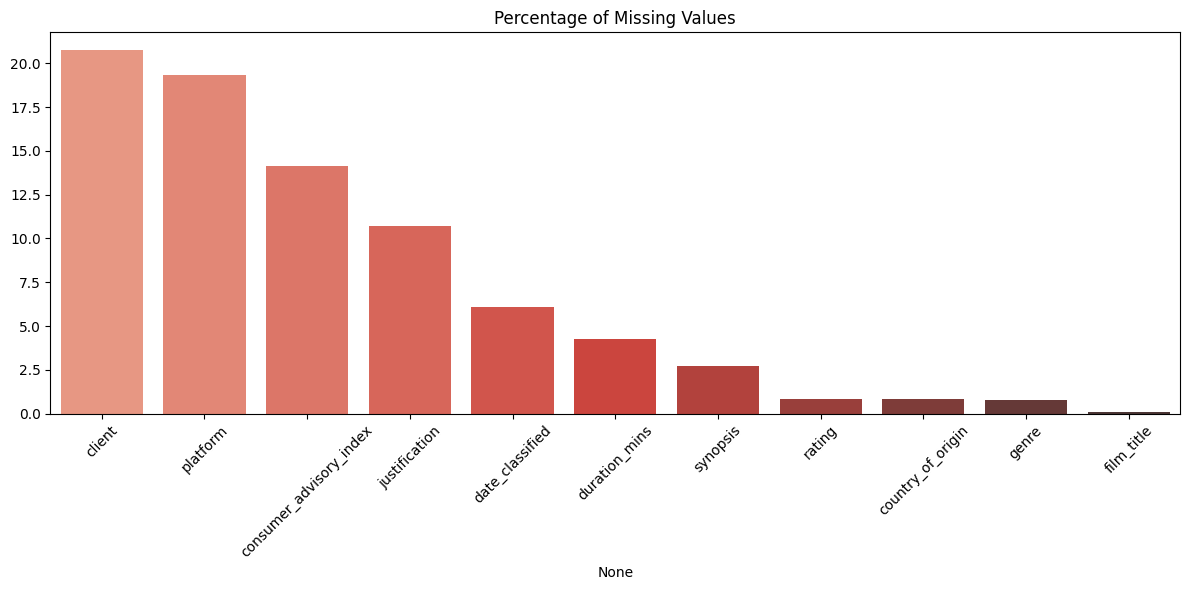

In [81]:
#plotting a distribution table
plt.figure(figsize=(12,6))
sns.barplot(x=missing_percentage.index, y = missing_percentage.values,palette='Reds_d')
plt.title('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
# Example: get counts
counts = merged_df.count()
total_rows = len(merged_df)

# Calculate percentage
percentages = (counts / total_rows) * 100

# Combine in a DataFrame
result = pd.DataFrame({
    'None - Null Count': counts,
    'Percentage': percentages.round(2)
})

# Sort ascending by percentage
result_sorted = result.sort_values(by='Percentage', ascending=True)

print(result_sorted)


                         None - Null Count  Percentage
Unnamed: 16                              1        0.04
film_class                             621       23.98
website                                777       30.00
contact                               1217       46.99
venue                                 1683       64.98
client                                2053       79.27
platform                              2089       80.66
consumer_advisory_index               2224       85.87
justification                         2312       89.27
date_classified                       2450       94.59
duration_mins                         2479       95.71
synopsis                              2519       97.26
rating                                2569       99.19
country_of_origin                     2569       99.19
genre                                 2570       99.23
film_title                            2587       99.88


In [45]:
merged_df['Class of Film'].value_counts()

KeyError: 'Class of Film'

In [ ]:
# Convert all values to lowercase and strip leading/trailing whitespace:

merged_df['Class of Film'] = merged_df['Class of Film'].str.lower().str.strip()



In [ ]:
merged_df['Class of Film'].value_counts()

Class of Film
series           504
movie             58
film              42
trailer            8
commercial         5
short film         1
trailer 1          1
trailer 2          1
class of film      1
Name: count, dtype: int64

In [ ]:
# Create a mapping for standardization
class_map = {
    'film': 'film',
    'movie': 'film',
    'short film': 'short film',
    'series': 'series',
    'trailer': 'trailer',
    'commercial': 'advertisement',
    'trailer 1': 'trailer',
    'trailer 2': 'trailer',
    'class of film': None  # likely a junk value
}


In [ ]:
#Apply the mapping (handle unmapped values too)
merged_df['Class of Film'] = merged_df['Class of Film'].map(class_map)

In [ ]:
merged_df =merged_df[merged_df['Class of Film'].notnull()]

In [ ]:
merged_df['Class of Film'].value_counts()

Class of Film
series           504
film             100
trailer           10
advertisement      5
short film         1
Name: count, dtype: int64

In [ ]:
merged_df['Class of Film'].isnull().sum()

np.int64(0)

In [ ]:
merged_df.isnull().sum()

No                     0
Film Title             0
Class of Film          0
Genre                  0
Synopsis               1
Rating                 0
CAI                   11
Justification          9
Duration (mins)        3
Date Classified        1
Country of Origin      0
Venue                  4
Client                24
Contact              609
Platform              31
Website              285
Year Range             0
dtype: int64

In [ ]:

if duration < 5:
    class = 'Advertisement'
elif duration < 20:
    class = 'Short Film'
elif duration < 60:
    class = 'TV Episode'
else:
    class = 'Feature Film'

SyntaxError: invalid syntax (2900954353.py, line 2)